In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
%matplotlib inline


In [36]:
df = pd.read_csv('../other/frac_merge_peak.csv')


In [38]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', 
        u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', 
        u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', 
        u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', 
        u'XEC_FIELD', u'Reservoir']]
y = df[[u'OIL_Peak']]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_primary = X_train[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Perfs/Cluster', 
                           u'Fluid_Bbls', u'Prop_Lbs', u'XEC_FIELD', u'Reservoir']]
X_train_secondary = X_train[[u'Cluster_Spacing', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', 
                             u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc',
                             u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', 
                             u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'XEC_FIELD', u'Reservoir']]


In [57]:
print 'All:'
print X.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Train:'
print X_train.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Test:'
print X_test.groupby('XEC_FIELD')['XEC_FIELD'].count()

All:
XEC_FIELD
COTTONWOOD DRAW    14
DIXIELAND          47
FORD, WEST         91
GRISHAM             9
PHANTOM             7
RED HILLS           1
STATELINE           3
TWO GEORGES         6
Name: XEC_FIELD, dtype: int64

Train:
XEC_FIELD
COTTONWOOD DRAW    12
DIXIELAND          33
FORD, WEST         66
GRISHAM             7
PHANTOM             7
RED HILLS           1
STATELINE           2
TWO GEORGES         5
Name: XEC_FIELD, dtype: int64

Test:
XEC_FIELD
COTTONWOOD DRAW     2
DIXIELAND          14
FORD, WEST         25
GRISHAM             2
STATELINE           1
TWO GEORGES         1
Name: XEC_FIELD, dtype: int64


In [58]:
print 'All:'
print X.groupby('Reservoir')['Reservoir'].count()
print
print 'Train:'
print X_train.groupby('Reservoir')['Reservoir'].count()
print
print 'Test:'
print X_test.groupby('Reservoir')['Reservoir'].count()

All:
Reservoir
Wolfcamp Shale A    89
Wolfcamp Shale C    14
Wolfcamp Shale D    75
Name: Reservoir, dtype: int64

Train:
Reservoir
Wolfcamp Shale A    69
Wolfcamp Shale C     9
Wolfcamp Shale D    55
Name: Reservoir, dtype: int64

Test:
Reservoir
Wolfcamp Shale A    20
Wolfcamp Shale C     5
Wolfcamp Shale D    20
Name: Reservoir, dtype: int64


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Text yticklabel objects>)

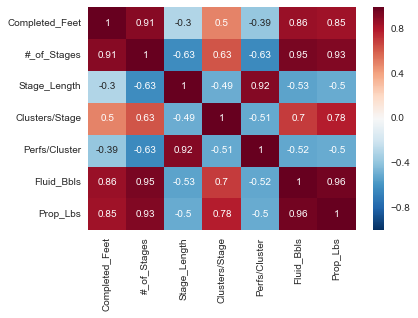

In [41]:
sns.heatmap(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1).corr(), annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


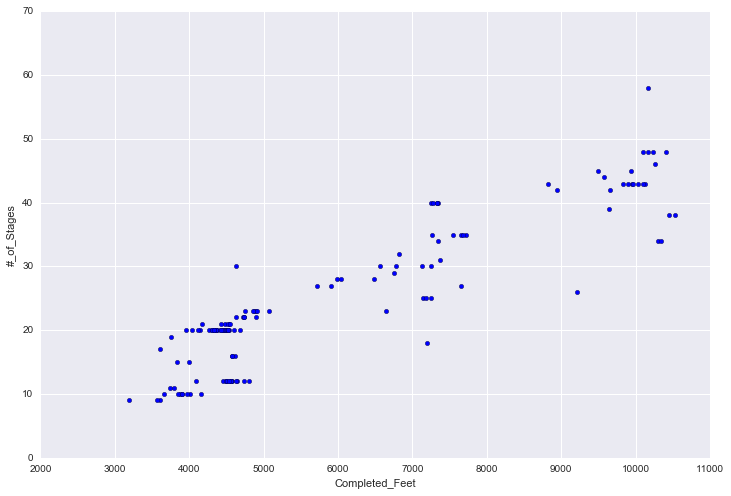

In [42]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Completed_Feet'], X_train['#_of_Stages'])
ax.set_xlabel('Completed_Feet')
ax.set_ylabel('#_of_Stages')


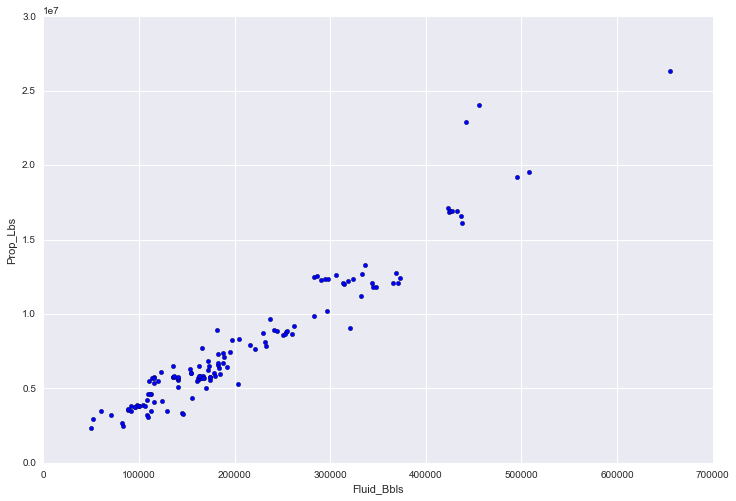

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Fluid_Bbls'], X_train['Prop_Lbs'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('Prop_Lbs')


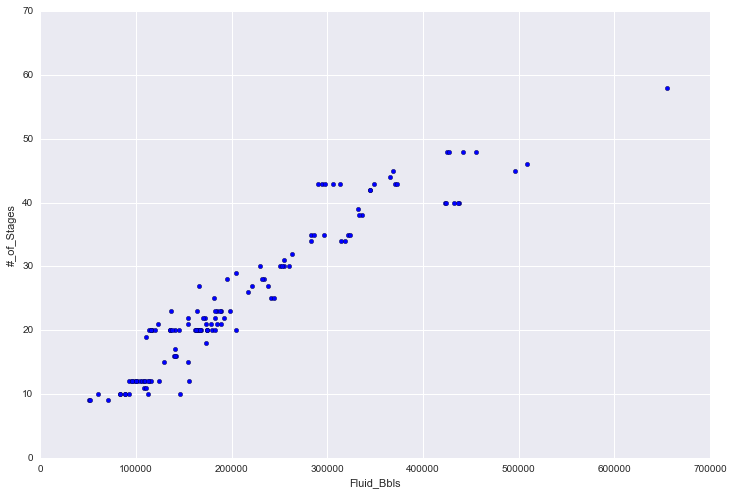

In [44]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Fluid_Bbls'], X_train['#_of_Stages'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('#_of_Stages')


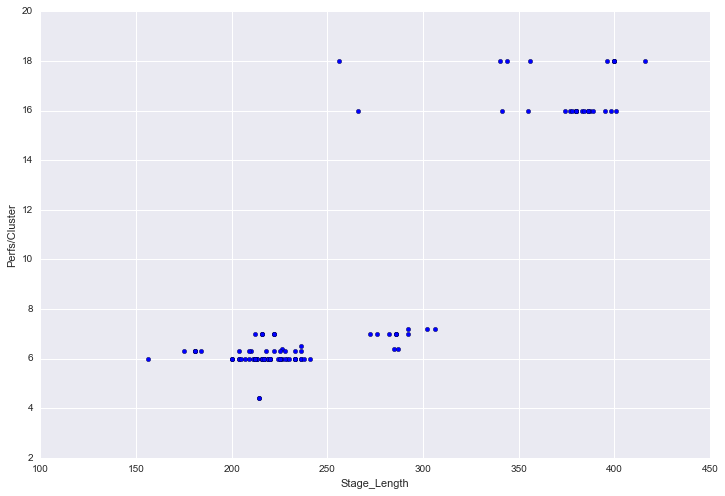

In [45]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Stage_Length'], X_train['Perfs/Cluster'])
ax.set_xlabel('Stage_Length')
ax.set_ylabel('Perfs/Cluster')


In [48]:
# X_mod1 = sm.add_constant(X_primary)
model = sm.OLS(y_train, X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.02e-57
Time:                        14:10:57   Log-Likelihood:                -906.60
No. Observations:                 133   AIC:                             1827.
Df Residuals:                     126   BIC:                             1847.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0156      0.037      0.

In [49]:
# X_mod2 = sm.add_constant(X_secondary)
model = sm.OLS(y_train, X_train_secondary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     69.72
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           3.63e-53
Time:                        14:11:36   Log-Likelihood:                -889.80
No. Observations:                 133   AIC:                             1816.
Df Residuals:                     115   BIC:                             1868.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Cluster_Spacing      10.8098      4.77

In [52]:
# X_mod3 = sm.add_constant(X)
model = sm.OLS(y_train, X_train.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     57.77
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           2.91e-51
Time:                        14:13:18   Log-Likelihood:                -877.31
No. Observations:                 133   AIC:                             1805.
Df Residuals:                     108   BIC:                             1877.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Completed_Feet        0.0521      0.06

In [15]:
X.columns

Index([u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage',
       u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft',
       u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft',
       u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc',
       u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster',
       u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft',
       u'5"_SIP/Ft'],
      dtype='object')

In [53]:
# X_RFE = X_train[[u'Rate/Ft', u'ISIP/Ft', u'5"_SIP/Ft',  u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Perf', u'Rate/Cluster', 
#             u'Clusters/Stage', u'Max_Rate', u'Max_Prop_Conc', u'Avg_Rate', u'#_of_Stages', u'Cluster_Spacing',
#            u'Stage_Length', u'Fluid_Gal/Ft', u'Completed_Feet', u'Fluid_Gal/Ft', u'Avg_Pressure', u'Prop_Lbs/Ft',
#            u'Prop_Lbs/Perf', u'Max_Pressure', u'Prop_Lbs/Cluster', u'Fluid_Gal/Cluster', u'Fluid_Bbls', u'Prop_Lbs']]
X_RFE = X_train[[u'Rate/Ft', u'ISIP/Ft', u'5"_SIP/Ft',  u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Perf', u'Rate/Cluster', 
            u'Clusters/Stage', u'Max_Rate', u'Max_Prop_Conc', u'Avg_Rate', u'#_of_Stages', u'Cluster_Spacing',
           u'Stage_Length', u'Fluid_Gal/Ft']]


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

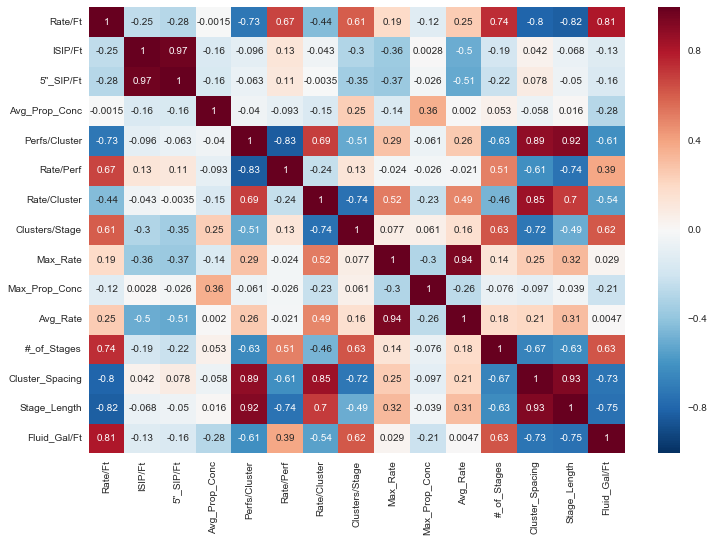

In [54]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_RFE.corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [55]:
# X_mod4 = sm.add_constant(X_uncorr)
model = sm.OLS(y_train, X_RFE)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     81.11
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           9.97e-55
Time:                        14:15:04   Log-Likelihood:                -893.25
No. Observations:                 133   AIC:                             1816.
Df Residuals:                     118   BIC:                             1860.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Rate/Ft          3143.0787   2511.985     